In [3]:
import os
import pandas as pd
import sys
import json
from google.protobuf.json_format import Parse

sys.path.insert(0, 'compiled_protobufs')
from taskmap_pb2 import TaskMap

qrels_folder = os.path.join(os.getcwd(), 'measurements', 'judgments')
run_cooking_folder = os.path.join(os.getcwd(), 'measurements', 'cooking', 'run_files')
run_diy_folder = os.path.join(os.getcwd(), 'measurements', 'diy', 'run_files')


In [34]:
# ## save qrels files

# with open(qrels_path, "w") as f:
#     pd_annotations = pd.read_csv(annotations_path)
#     lines = []
#     # print(pd_annotations.head())
#     for idx, annotation in pd_annotations.iterrows():
#         q_id, doc_id, score = annotation["query-id"], annotation["doc-id"], annotation["relevance"]
#         lines.append(f'{q_id} Q0 {doc_id} {score}\n')
#     lines[-1] = lines[-1].replace("\n","")
#     f.writelines(lines)
    

In [54]:
# run_path = os.path.join(os.getcwd(), 'datasets', 'qrles')
# taskmap_cooking_index_path = os.path.join(os.getcwd(), "indexes", "food", "system_index_sparse")


In [69]:

# from pygaggle.rerank.base import Query, Text, hits_to_texts
# from pygaggle.rerank.transformer import MonoT5

# config = [
#     "bm25",
#     "bm25+rm3",
#     "bm25+t5",
#     "bm25+rm3+t5",
# ]

In [1]:


# cooking_queries = pd.read_csv(queries_path).iloc[:10]
# reranker =  MonoT5()

# def get_searcher(search_model):
#     if search_model == "bm25" or search_model == "bm25+t5":
#         searcher = LuceneSearcher(index_dir=taskmap_cooking_index_path)
#         searcher.set_bm25(b=0.4, k1=0.9)
#     if search_model == "bm25+rm3" or search_model == "bm25+rm3+t5":
#         searcher = LuceneSearcher(index_dir=taskmap_cooking_index_path)
#         searcher.set_bm25(b=0.4, k1=0.9)
#         searcher.set_rm3(fb_terms=10, fb_docs=10, original_query_weight=0.5)
#     return searcher

# for model in config:
#     lines = []
#     for idx, query in cooking_queries.iterrows():
#         print(f"Initialize searcher {model}")
#         searcher = get_searcher(model)
#         hits = searcher.search(q=query["target query"], k=50)
#         if "t5" in model:
#             hits = reranker.rerank(Query(query["target query"]), hits_to_texts(hits))
#         for rank, hit in enumerate(hits):
#             if type(hit) == Text:
#                 doc_json = json.loads(hit.text)
#             else:
#                 doc_json = json.loads(hit.raw)
#             taskmap_json = doc_json['recipe_document_json']
#             taskmap = Parse(json.dumps(taskmap_json), TaskMap())
#             doc_id = taskmap.taskmap_id
#             line = f'query-{idx} Q0 {doc_id} {rank+1} {hit.score} bm25\n'
#             lines.append(line)
#     lines[-1] = lines[-1].replace("\n","")

#     with open(os.path.join(run_path, model+".run"), "w") as f:
#         f.writelines(lines)
        



In [88]:
import ir_measures
from ir_measures import *
import numpy as np

# qrles = ir_measures.read_trec_qrels('qrels/qrls.qrles')
# run = ir_measures.read_trec_run('qrels.run')

# for model in config:
#     print(os.path.join(run_path, model+".run"))
#     qrles = ir_measures.read_trec_qrels(qrels_path)
#     run = ir_measures.read_trec_run(os.path.join(run_path, model+".run"))
#     accuracy = ir_measures.calc_aggregate([nDCG@3, Precision@3, Recall@3], qrles, run)
#     print(f"{model}: {accuracy}")

def get_accuracy(run_filepath, qrles_filepath):
    run = ir_measures.read_trec_run(run_filepath)
    qrles = ir_measures.read_trec_qrels(qrles_filepath)
    accuracy = ir_measures.calc_aggregate([nDCG@3, nDCG@5, nDCG@10, Precision@3, Precision@5, Precision@10, Recall@10, Recall@25, MAP], qrles, run)
    return accuracy

def get_precision_recall(run_filepath, qrles_filepath):
    run = ir_measures.read_trec_run(run_filepath)
    qrles = ir_measures.read_trec_qrels(qrles_filepath)
    precs = [IPrec@round(p,1) for p in np.arange(0,1.1,0.1)]
    iprec = ir_measures.calc_aggregate(precs, qrles, run)
    return iprec


import matplotlib.pyplot as plt
from sklearn.metrics import PrecisionRecallDisplay
import numpy as np


def show_iprecs(results_iprec):
  precison_scores = np.arange(0, 1.1, 0.1)
  # models = ["TF-IDF", "BM25", "PL2"]

  fig, ax = plt.subplots(figsize=(7,6))

  for model_name, res in results_iprec.items():
    recall_scores = res
    ax.plot(precison_scores,recall_scores, drawstyle='steps-pre',label=model_name)
  

  ax.set_xticks(np.arange(0, 1.1, step=0.1))
  ax.set_yticks(np.arange(0, 1.1, step=0.1))
  ax.set_xlim(left=0)
  # ax.set_ylim(down=0)
  ax.set_title(f"Precision-Recall Curve")
  ax.set_xlabel('Recall')
  ax.set_ylabel('Precision')
  ax.grid(axis='both', linestyle='--')
  ax.legend(loc='upper right')


# def get_stats(run_filepath, qrles_filepath):
    # run = ir_measures.read_trec_run(run_filepath)
    # qrles = ir_measures.read_trec_qrels(qrles_filepath)
    # precs = [IPrec(rel=2)@round(p,1) for p in np.arange(0,1.1,0.1)]
    # iprec = ir_measures.calc_aggregate(precs, qrles, run)
    # return iprec

In [5]:
cooking_runs = os.listdir(run_cooking_folder)
cooking_qrles = os.path.join(qrels_folder, "cooking.qrles")

for searcher in cooking_runs:
    run = os.path.join(run_cooking_folder, searcher)
    searcher_name = searcher[:-4].lower()
    # print(searcher_name, run)
    accuracy = get_accuracy(run, cooking_qrles)
    print(searcher_name, accuracy)
    

bm25+rm3 {P@3: nan, nDCG@10: nan, P@10: nan, P@5: nan, AP: nan}
marqo {P@3: nan, nDCG@10: nan, P@10: nan, P@5: nan, AP: nan}
marqo-target {P@3: nan, nDCG@10: nan, P@10: nan, P@5: nan, AP: nan}
bm25+rm3+t5 {P@3: nan, nDCG@10: nan, P@10: nan, P@5: nan, AP: nan}
ance {P@3: nan, nDCG@10: nan, P@10: nan, P@5: nan, AP: nan}
bm25 {P@3: nan, nDCG@10: nan, P@10: nan, P@5: nan, AP: nan}
bm25+t5 {P@3: nan, nDCG@10: nan, P@10: nan, P@5: nan, AP: nan}
tct-colbertv2 {P@3: nan, nDCG@10: nan, P@10: nan, P@5: nan, AP: nan}


In [29]:


diy_runs = os.listdir(run_diy_folder)
diy_qrles = os.path.join(qrels_folder, "diy.qrles")

results = {}
for searcher in sorted(diy_runs):
    run = os.path.join(run_diy_folder, searcher)
    searcher_name = searcher[:-4].lower()
    # print(searcher_name, run)
    accuracy = get_accuracy(run, diy_qrles)
    results[searcher_name] = accuracy
    # print(searcher_name, accuracy)
    # print(type(accuracy))
    
df = pd.DataFrame(results).transpose()
# df[["AP", "nDCG@3", "nDCG@5", "nDCG@10", "P@3", "P@5", "P@10", "R@10", "R@25"]]
df

,AP,nDCG@3,nDCG@10,P@10,P@3,nDCG@5,R@25,R@10,P@5
tct-colbertv2,0.515468,0.728618,0.649280,0.576,0.806667,0.683120,0.632784,0.459690,0.726
ance,0.421227,0.694842,0.595871,0.504,0.750000,0.639273,0.531427,0.389222,0.662
bm25+rm3+t5,0.613461,0.733648,0.721481,0.701,0.810000,0.715442,0.741127,0.545050,0.782
bm25+rm3,0.543364,0.629136,0.617084,0.617,0.743333,0.609331,0.690939,0.468586,0.702
bm25+t5,0.598473,0.721815,0.710791,0.684,0.790000,0.703808,0.734722,0.532561,0.768
bm25,0.521407,0.624523,0.596877,0.586,0.730000,0.606046,0.679432,0.449393,0.692
marqo,0.471012,0.611005,0.579773,0.548,0.710000,0.585291,0.606340,0.429362,0.660


TCT-ColBERTv2.run [0.9697383341296384, 0.9308119272032315, 0.8315737699356625, 0.7392814053558752, 0.6337993815672323, 0.5595210291227212, 0.43703411090438654, 0.32478872503183387, 0.2302394491205213, 0.11749083698187275, 0.06300403130362038]
ance.run [0.9498809523809524, 0.8852380952380954, 0.7618292208998731, 0.6409662578810665, 0.5442449569138258, 0.4361754235654703, 0.26953323600052326, 0.16136344706641703, 0.09993502708170293, 0.04866617376075296, 0.01863586227567345]
bm25+rm3.run [0.896433621933622, 0.8697113997113997, 0.8083741284119843, 0.7498320316198875, 0.6774393474207018, 0.6120350128987428, 0.49168988818243187, 0.4001366457329164, 0.29859978903678425, 0.2043263851367485, 0.1485615048023808]
bm25.run [0.9049058302808303, 0.8679166527916525, 0.7874464761372654, 0.7242321242961927, 0.6471153215119934, 0.5825834942544208, 0.4725782576405587, 0.38471539097773216, 0.2633526811057373, 0.17631004383306198, 0.1164521289559605]
marqo.run [0.9030952935952936, 0.8498890418890419, 0.76

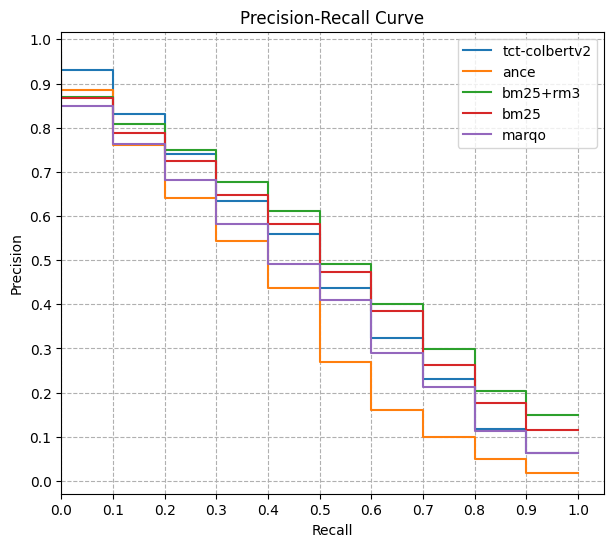

In [90]:
results_iprec = {}
precs = [IPrec@round(p,1) for p in np.arange(0,1.1,0.1)]
for searcher in sorted(diy_runs):
    if "t5" in searcher:
      continue  
    run = os.path.join(run_diy_folder, searcher)
    searcher_name = searcher[:-4].lower()
    iprec = get_precision_recall(run, diy_qrles)
    vals = [iprec[prec] for prec in precs]
    results_iprec[searcher_name] = vals
    print(searcher, vals)
show_iprecs(results_iprec)